 # Major League Soccer Exploratory Data Analysis  
 
 by Will Talbot
 
This an exploratory data analysis (EDA) of Major League Soccer salaries from 2007 to 2017 (July salaries). This was originally my first submission to Kaggle where I analyzed Major League Soccer player salaries and how they have changed since 2007. This EDA has been modified and expanded and offers more detailed. 

The Steps:
 1. Import the Data
 2. Wrangle (Clean and Manipulate) the Data
 3. Analyze and Plot the Data
 
 
 
 This data was made available by Jeremy Singer-Vine (Data is Plural) and be found at https://github.com/data-is-plural/mls-salaries

## Importing the Data ##

I imported all 11 CSV files of data and concatenated them into one dataframe, named **df_mls**. I created a new column, named **'Season'** that states which the corresponding season for the given row. 

In [1]:
# Import the necessary Python libraries
import numpy as np
import pandas as pd 
import glob, os.path
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import all 11 CSV  files and concatenate them into one dataframe
path = glob.glob("../Projects_new/data/MLS Salaries 2007-2017/*.csv")
dfs = [pd.read_csv(i).assign(Season=os.path.basename(i)) for i in path]
df_mls = pd.concat(dfs, ignore_index = True)

## Wrangling the Data ##

Next I wrangled, or cleaned and manipulated, the data to ensure that the data set was usable format for analysis. 

In [3]:
# A new column named "Season" will be created and added to the new dataframe
df_mls['Season'] = df_mls['Season'].str.replace('mls-salaries-', '')
df_mls['Season'] = df_mls['Season'].str.replace('.csv', '')

In [4]:
df_mls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5553 entries, 0 to 5552
Data columns (total 7 columns):
club                       5533 non-null object
last_name                  5553 non-null object
first_name                 5534 non-null object
position                   5552 non-null object
base_salary                5552 non-null float64
guaranteed_compensation    5552 non-null float64
Season                     5553 non-null object
dtypes: float64(2), object(5)
memory usage: 303.8+ KB


In [5]:
df_mls.head()

,club,last_name,first_name,position,base_salary,guaranteed_compensation,Season
0,CHI,Armas,Chris,M,225000.0,225000.0,2007
1,CHI,Banner,Michael,M,12900.0,12900.0,2007
2,CHI,Barrett,Chad,F,41212.5,48712.5,2007
3,CHI,Blanco,Cuauhtemoc,F,2492316.0,2666778.0,2007
4,CHI,Brown,C.J.,D,106391.0,106391.0,2007


In [6]:
# Observe the missing rows indicated from the unequal non-null object count from df_mls.info()
null_data = df_mls[df_mls.isnull().any(axis=1)]
null_data[:15]

,club,last_name,first_name,position,base_salary,guaranteed_compensation,Season
559,SEA,Keller,Kasey,GK,NaN,NaN,2008
1817,KC,Jeferson,NaN,F,429996.0,484996.0,2011
2112,CHI,Alex,NaN,M,96000.0,105950.0,2012
2356,LA,Juninho,NaN,M,50000.0,65625.0,2012
2548,NaN,Sassano,Luke,M-D,81000.0,83025.0,2012
2640,NaN,White,Jeremiah,M,44004.0,44004.0,2012
2669,CHI,Alex,NaN,M,110000.0,119950.0,2013
2683,NaN,Araujo Jr.,Paulo,F,60000.0,60000.0,2013
2811,NaN,Dunfield,Terry,M,120000.0,120000.0,2013
2928,LA,Juninho,NaN,M,290000.0,290000.0,2013


**After looking at the null values, I came to the following conclusions:**

 - The null values for **'first_name'** can be explained by certain players known by only one name, such as Kaka. 
 - The null values for the column **'club'** can be explained by players being free agents. 
 - The null values for **'position'** and **'guaranteed_salary'** and **'base_salary'** are due to missing data.

**To Resolve the Null Values for 'first_name':**

I wrote a function to combine the **'first_name'** and **'last_name'** columns together which also takes into account when players have only a first name and add this value to a new column **'Name'**.

In [7]:
# Create a new Column "Name" that combines first and last name together 
def fullname(x, y):
    if str(x) == "nan":
        return str(y)
    else:
        return str(x) + " " + str(y)

In [8]:
# Apply fullname functon to the dataframe
df_mls['Name'] = np.vectorize(fullname)(df_mls['first_name'], df_mls['last_name'])

In [9]:
# Drop the 'last_name' and 'first_name' columns
df_mls = df_mls.drop(['last_name', 'first_name'], axis = 1)

In [10]:
# Rearrange the order of the columns
df_mls = df_mls[['Season', 'club', 'Name', 'position', 'guaranteed_compensation', 'base_salary']]
df_mls.head()

,Season,club,Name,position,guaranteed_compensation,base_salary
0,2007,CHI,Chris Armas,M,225000.0,225000.0
1,2007,CHI,Michael Banner,M,12900.0,12900.0
2,2007,CHI,Chad Barrett,F,48712.5,41212.5
3,2007,CHI,Cuauhtemoc Blanco,F,2666778.0,2492316.0
4,2007,CHI,C.J. Brown,D,106391.0,106391.0


 **To Resolve the Different Values For the Same Clubs, Null Values Odd Values for 'club':**

I wrote two functions that correctly assigns players with the incorrect  values 'TFC' and 'NYRB' for 'Club' to 'TOR' and 'NY'. Also, I wrote a function that assigns free agent players, which I defined as players with 'club' being 'Nan', 'None',  'POOL' or 'Pool'. I determined 'POOL' and 'Pool' refer to players who are contracted to MLS, but do not play for a club on a consistent basis. I also created a new dataframe for the free agent players, named **df_free_agents,** and removed them from the main dataframe, **df_mls**.

In [11]:
# Observe the different 'club' names
df_mls['club'].unique()

array(['CHI', 'CHV', 'CLB', 'COL', 'DAL', 'DC', 'HOU', 'KC', 'LA', 'NE',
       'NY', 'Pool', 'RSL', 'TFC', 'SJ', 'SEA', 'PHI', 'None', 'VAN',
       'POR', 'TOR', 'POOL', 'MTL', nan, 'ORL', 'NYCFC', 'ATL', 'NYRB',
       'LAFC', 'MNUFC'], dtype=object)

**To make the club names consistent:**


In [12]:
# TFC and TOR are the same and NYRB and NY are the same
def club_fixer(x):
    if str(x) == 'TFC':
        return 'TOR'
    if str(x) == 'NYRB':
        return 'NY'
    else:
        return str(x)

In [13]:
df_mls['club'] = df_mls['club'].apply(club_fixer)

** To fix the 'Pool' club and Free Agent issue:**

In [14]:
# Investigating what  the 'club' values of 'pool' and 'POOL' are
df_mls[(df_mls['club'] == 'Pool') |(df_mls['club'] == 'POOL') ]

,Season,club,Name,position,guaranteed_compensation,base_salary
311,2007,Pool,David Monsalve,GK,30000.00,30000.00
312,2007,Pool,Boris Pardo,GK,17700.00,17700.00
313,2007,Pool,Samuel Reynolds,GK,17700.00,17700.00
314,2007,Pool,Kenny Schoeni,GK,17700.00,17700.00
378,2008,Pool,Jose Angulo,F,12900.00,12900.00
506,2008,Pool,Mike Graczyk,GK,17700.00,17700.00
556,2008,Pool,Andrew Kartunen,GK,12900.00,12900.00
616,2008,Pool,David Monsalve,GK,33000.00,33000.00
694,2008,Pool,Bryant Rueckner,GK,17700.00,17700.00
711,2008,Pool,Christopher Sharpe,GK,33000.00,33000.00


In [15]:
# Create a function to assign rows to "Free Agent"
def free_agent(x):
    if str(x) == "nan":
        return str("Free Agent")
    elif str(x) == 'None':
        return str("Free Agent")
    elif str(x) == 'Pool':
        return str("Free Agent")
    elif str(x) == 'POOL':
        return str("Free Agent")
    else:
        return str(x)

In [16]:
# Apply the free_agent function to the dataframe
df_mls['club'] = df_mls['club'].apply(free_agent)

In [17]:
# Create a new dataframe for free agents and observe the new dataframe
df_free_agents = df_mls[df_mls['club'] == 'Free Agent']
df_free_agents.head(10)

,Season,club,Name,position,guaranteed_compensation,base_salary
311,2007,Free Agent,David Monsalve,GK,30000.0,30000.0
312,2007,Free Agent,Boris Pardo,GK,17700.0,17700.0
313,2007,Free Agent,Samuel Reynolds,GK,17700.0,17700.0
314,2007,Free Agent,Kenny Schoeni,GK,17700.0,17700.0
378,2008,Free Agent,Jose Angulo,F,12900.0,12900.0
506,2008,Free Agent,Mike Graczyk,GK,17700.0,17700.0
556,2008,Free Agent,Andrew Kartunen,GK,12900.0,12900.0
616,2008,Free Agent,David Monsalve,GK,33000.0,33000.0
694,2008,Free Agent,Bryant Rueckner,GK,17700.0,17700.0
711,2008,Free Agent,Christopher Sharpe,GK,33000.0,33000.0


In [18]:
# Remove 'Free Agents' from the dataframe  
df_mls.drop(df_mls[df_mls['club'] == 'Free Agent'].index, inplace=True)

**To Resolve the Null Value for Position:**

In this dataset, the positions are represented by the following: Goalkeeper (GK), Defender (D), Midfielder (M), and Forward (F). There was one row with a missing value for 'position'. This player, Matheus Silva, appeared in other seasons and I assigned the missing position to the value that matched his other position data. I dropped the row for Kasey Keller, because his contract did not begin for the 2008 Season.

In [19]:
# Observe the rows with missing position and salary data
df_mls[df_mls['position'].isnull() | df_mls['base_salary'].isnull()]

,Season,club,Name,position,guaranteed_compensation,base_salary
559,2008,SEA,Kasey Keller,GK,NaN,NaN
4293,2015,SJ,Matheus Silva,NaN,50000.04,50000.04


In [20]:
# Does the Matheus Silva player in other seasons? If so, what position does he play?
df_mls[df_mls['Name'] == 'Matheus Silva']

,Season,club,Name,position,guaranteed_compensation,base_salary
4293,2015,SJ,Matheus Silva,NaN,50000.04,50000.04
4871,2016,SJ,Matheus Silva,M,52500.00,52500.00
5485,2017,SJ,Matheus Silva,M,65000.00,65000.00


In [21]:
# Assign the missing value the correct value
df_mls.loc[4293, 'position'] = str('M')

In [22]:
# Observe the rows for Kasey Keller
df_mls[df_mls['Name'] == 'Kasey Keller']

,Season,club,Name,position,guaranteed_compensation,base_salary
559,2008,SEA,Kasey Keller,GK,NaN,NaN
973,2009,SEA,Kasey Keller,GK,300000.0,300000.0
1370,2010,SEA,Kasey Keller,GK,300000.0,300000.0
1835,2011,SEA,Kasey Keller,GK,250000.0,250000.0


In [23]:
# Drop rows with missing base_salary
df_mls = df_mls[pd.notnull(df_mls['base_salary'])]

**Data Wranging for the Position Values:**

I wanted the 'position' values to be more consistent so I wrote a function that converts different position combinations into a consistent combination value. For example, instead of having 'MF', 'D-F', or 'F/M' as position values, the function converts these to 'M', 'D', and 'F'.   

In [24]:
# Observe the different positions
df_mls['position'].unique()

array(['M', 'F', 'D', 'GK', 'D-M', 'F-D', 'F-M', 'M-D', 'M-F', 'D-F', 'MF',
       'M/F', 'M/D', 'D/M', 'D/F', 'F/M'], dtype=object)

In [25]:
# Create a function to correct positions
def position_fixer(x):
    if x == 'D-M':
        return str('D')
    if x == 'D-F':
        return str('D')
    if x == 'D/M':
        return str('D')
    if x == 'D/F':
        return str('D')
    if x == 'M/F':
        return str('M')
    if x == 'M-F':
        return str('M')
    if x == 'M-D':
        return str('M')
    if x == 'M/D':
        return str('M')
    if x == 'MF':
        return str('M')
    if x == 'F/M':
        return str('F')
    if x == 'F-D':
        return str('F')
    if x == 'F-M':
        return str('F')
    else:
        return str(x)

In [26]:
# Apply the position_fixer function to the dataframe
df_mls['position'] = df_mls['position'].apply(position_fixer)

 **Data Cleaning/Wrangling Conclusion:**

The new dataframe **df_mls**  no longer has any nulls and is consistent with its values. It is ready for some exploratory analysis.

In [27]:
# Observe the new dataframe
df_mls.head()

,Season,club,Name,position,guaranteed_compensation,base_salary
0,2007,CHI,Chris Armas,M,225000.0,225000.0
1,2007,CHI,Michael Banner,M,12900.0,12900.0
2,2007,CHI,Chad Barrett,F,48712.5,41212.5
3,2007,CHI,Cuauhtemoc Blanco,F,2666778.0,2492316.0
4,2007,CHI,C.J. Brown,D,106391.0,106391.0


## Analyzing the Data ##

I was interested in observing how salary has changed over the eleven seasons so I looked trends by season, by club,  by position, and by the league overall. 

In [28]:
df_mls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5500 entries, 0 to 5550
Data columns (total 6 columns):
Season                     5500 non-null object
club                       5500 non-null object
Name                       5500 non-null object
position                   5500 non-null object
guaranteed_compensation    5500 non-null float64
base_salary                5500 non-null float64
dtypes: float64(2), object(4)
memory usage: 300.8+ KB


Observe the summary statistics based on Season

In [29]:
df_mls.groupby(by = 'Season').describe()

base_salary                                                   \
             count           mean            std       min      25%   
Season                                                                
2007         367.0  104619.161935  335440.916984  12900.00  17700.0   
2008         404.0  105946.280842  324760.680397  12900.00  17700.0   
2009         383.0  122044.641070  337185.439057  15300.00  34650.0   
2010         405.0  157274.657778  487596.380790  31250.04  40000.0   
2011         522.0  143419.685115  425075.780682  32600.00  42000.0   
2012         549.0  157115.096667  407850.314843  33750.00  44100.0   
2013         571.0  148007.791856  369586.991903  35125.00  46500.0   
2014         568.0  205041.528310  614782.271246  36500.00  48825.0   
2015         569.0  265741.882109  731091.547062  50000.00  60000.0   
2016         548.0  292739.663449  748256.334048  51492.00  63000.0   
2017         614.0  297172.981938  672583.897985  52999.92  65633.4   

                                         guaranteed_compensation  \
              50%        75%         max                   count   
Season                                                             
2007     46331.25  103199.50  5500000.08                   367.0   
2008     47537.50  112133.25  5500000.08                   404.0   
2009     65000.00  125000.00  5500000.08                   383.0   
2010     75000.00  132000.00  5544000.00                   405.0   
2011     69298.00  125000.00  5500000.08                   522.0   
2012     75000.00  140000.00  5000000.00                   549.0   
2013     75000.00  145000.00  4913004.00                   571.0   
2014     80000.00  160000.00  6660000.00                   568.0   
2015    100000.00  200000.00  6660000.00                   569.0   
2016    108918.75  225000.00  6660000.00                   548.0   
2017    125000.00  255000.00  6660000.00                   614.0   

                                                                      \
                 mean            std       min       25%         50%   
Season                                                                 
2007    114824.414360  387398.657030  12900.00  17700.00   50800.000   
2008    116745.814876  375924.467641  12900.00  17700.00   57925.000   
2009    135044.257154  387552.589055  15300.00  34650.00   77000.000   
2010    175020.401728  536416.624854  31260.00  42500.00   93250.000   
2011    162746.122241  475942.811635  32600.00  44000.00   79812.500   
2012    180362.925829  457718.551377  33750.00  47250.00   85833.330   
2013    165988.427846  401397.761581  35125.00  47750.00   88000.000   
2014    227637.363468  682713.528126  36500.00  49706.25   92750.000   
2015    293441.089613  804326.436295  50000.00  63000.00  112000.000   
2016    319461.056843  816695.627929  51492.00  68658.75  116833.335   
2017    326375.172524  749121.678538  52999.92  70030.35  135002.000   

                                
               75%         max  
Season                          
2007    115000.000  6500000.04  
2008    126062.500  6500000.04  
2009    137400.000  6500000.04  
2010    152500.000  6500000.04  
2011    149750.000  6500000.04  
2012    169000.000  5600000.00  
2013    168916.665  5038566.50  
2014    180250.000  7167500.00  
2015    215000.000  7167500.00  
2016    241312.500  7167500.00  
2017    279875.000  7167500.00

The number of clubs genreally had an upward trend. From 2007 to 2017 the league grew from 13 to 23 clubs.

In [30]:
# Number of Clubs per Season
club_count=df_mls.groupby('Season')['club'].nunique()
df_mls.groupby('Season')['club'].nunique()

Season
2007    13
2008    15
2009    15
2010    16
2011    18
2012    19
2013    19
2014    21
2015    20
2016    21
2017    23
Name: club, dtype: int64

In [31]:
# Observe the Average Salary by Season
df_mls.groupby(by = 'Season').mean()

,guaranteed_compensation,base_salary
Season,,
2007,114824.414360,104619.161935
2008,116745.814876,105946.280842
2009,135044.257154,122044.641070
2010,175020.401728,157274.657778
2011,162746.122241,143419.685115
2012,180362.925829,157115.096667
2013,165988.427846,148007.791856
2014,227637.363468,205041.528310
2015,293441.089613,265741.882109


This data has some outliers due to some players having salaries in the millions. Looking at the median will give a clearer understanding of how the league has changed over the years. 

In [32]:
# Observe the Median Salary by Season
df_mls.groupby(by = 'Season').median()

,guaranteed_compensation,base_salary
Season,,
2007,50800.000,46331.25
2008,57925.000,47537.50
2009,77000.000,65000.00
2010,93250.000,75000.00
2011,79812.500,69298.00
2012,85833.330,75000.00
2013,88000.000,75000.00
2014,92750.000,80000.00
2015,112000.000,100000.00


Observe the League Maximum and Minimum Salaries

In [33]:
mls_min = df_mls.groupby(by = 'Season')['guaranteed_compensation'].min()
mls_max = df_mls.groupby(by = 'Season')['guaranteed_compensation'].max()
df_extremes = pd.concat([mls_min, mls_max], axis = 1)
df_extremes

,guaranteed_compensation,guaranteed_compensation
Season,,
2007,12900.00,6500000.04
2008,12900.00,6500000.04
2009,15300.00,6500000.04
2010,31260.00,6500000.04
2011,32600.00,6500000.04
2012,33750.00,5600000.00
2013,35125.00,5038566.50
2014,36500.00,7167500.00
2015,50000.00,7167500.00


Here is another way to view club salary data by season. This shows the number of players per club, **Squad_Count**, and the total salary per club by season. 

In [34]:
df_mls['Squad_Count'] = 1
df_grouped = df_mls.groupby(['club', 'Season'])
df_grouped_final = df_grouped.agg({'guaranteed_compensation': 'sum','base_salary': 'sum', 'Squad_Count': 'sum'})
df_grouped_final

Squad_Count  base_salary  guaranteed_compensation
club Season                                                   
ATL  2016              3    177012.00                177012.00
     2017             31   8035616.04               9007758.26
CHI  2007             29   4412517.50               4716304.50
     2008             28   4382546.92               4808167.25
     2009             24   4721583.75               5134229.08
     2010             24   4836214.00               5559103.83
     2011             30   2538304.04               3012683.04
     2012             31   3600214.00               4145876.33
     2013             33   4465170.00               4963357.33
     2014             29   3529746.00               3771132.08
     2015             26   5389775.00               5843613.53
     2016             25   5292596.00               5600172.50
     2017             27  12272624.00              12952278.17
CHV  2007             28   1678270.70               1789645.70
     2008             32   2294449.17               2487846.19
     2009             30   2353283.33               2449694.04
     2010             28   2389825.00               2477548.21
     2011             29   3346214.00               3924919.30
     2012             28   3047728.00               3572341.63
     2013             29   2409807.50               2577421.13
     2014             29   3077432.04               3306115.37
CLB  2007             29   1889551.06               2108226.06
     2008             31   2088180.81               2372680.81
     2009             25   2573342.50               2903550.84
     2010             23   2372912.00               2808203.67
     2011             30   3004123.12               3551414.79
     2012             30   3111134.00               3717509.00
     2013             30   3169668.00               3642001.34
     2014             30   3176361.50               3537826.77
     2015             29   5296983.52               5745122.37
...                  ...          ...                      ...
SEA  2016             29   9479113.50              10728811.09
     2017             25   8986702.89              10306150.48
SJ   2008             27   2401587.75               2503382.38
     2009             23   2003760.00               2116203.75
     2010             24   2273338.00               2518590.08
     2011             29   2600712.04               2853603.71
     2012             30   2878166.29               3174895.53
     2013             30   3558741.50               3776311.48
     2014             29   3957076.00               4349505.20
     2015             29   4821892.24               5332505.76
     2016             29   5821616.92               6409400.25
     2017             29   6429566.00               6959287.11
TOR  2007             27   2310050.00               2653987.50
     2008             25   2354874.63               2726478.80
     2009             22   3577074.00               4152167.05
     2010             25   4786124.00               5214381.05
     2011             33   5564222.00               6659618.84
     2012             29   5829467.00               7446623.67
     2013             28   3610449.86               4349637.18
     2014             29  15686628.50              16712603.18
     2015             29  19761936.96              22136512.03
     2016             26  19534650.00              21798508.57
     2017             27  20074947.00              22399815.27
VAN  2011             30   3566997.08               4004986.38
     2012             28   4551665.96               5216754.95
     2013             30   4279508.04               4792171.27
     2014             29   4542729.00               5168608.09
     2015             31   5526615.04               6261094.71
     2016             28   6012441.58               6565602.91
     2017             32   7040366.08               8079371.07

[200 rows x 3 columns]

**Quick Observations:** As the league increased in the number of clubs and players, salaries increased where the minimual salary as well. 

The next question to address is which players were the biggest earners in the league.

### Highest Paid Player per Season 2007-2017###

In [35]:
del df_mls['Squad_Count']
df_mls.sort_values('guaranteed_compensation', ascending=False).groupby('Season', as_index=False).first()

,Season,club,Name,position,guaranteed_compensation,base_salary
0,2007,LA,David Beckham,M,6500000.04,5500000.08
1,2008,LA,David Beckham,M,6500000.04,5500000.08
2,2009,LA,David Beckham,M,6500000.04,5500000.08
3,2010,LA,David Beckham,M,6500000.04,5500000.08
4,2011,LA,David Beckham,M,6500000.04,5500000.08
5,2012,NY,Thierry Henry,F,5600000.00,5000000.00
6,2013,SEA,Clint Dempsey,F,5038566.50,4913004.00
7,2014,ORL,Kaka,M,7167500.00,6660000.00
8,2015,ORL,Kaka,M,7167500.00,6660000.00
9,2016,ORL,Kaka,M,7167500.00,6660000.00


###Highest Paid Player per Position 2007-2017###

In [36]:
df_positions =df_mls.sort_values('guaranteed_compensation', ascending=False).groupby('position', as_index=False).first()
df_positions.sort_values('guaranteed_compensation', ascending=False)

,position,Season,club,Name,guaranteed_compensation,base_salary
3,M,2015,ORL,Kaka,7167500.00,6660000.0
1,F,2017,TOR,Sebastian Giovinco,7115555.67,5600000.0
0,D,2010,NY,Rafael Marquez,5544000.00,5544000.0
2,GK,2016,COL,Tim Howard,2575000.00,2100000.0


### Ten Highest Paid Players of the 2017 Season###

In [37]:
df_top17 = df_mls[df_mls['Season'] == '2017']
df_top17.sort_values('guaranteed_compensation', ascending = False)[:10]

,Season,club,Name,position,guaranteed_compensation,base_salary
5338,2017,ORL,Kaka,M,7167500.00,6660000.0
5505,2017,TOR,Sebastian Giovinco,F,7115555.67,5600000.0
5497,2017,TOR,Michael Bradley,M,6500000.00,6000000.0
5286,2017,NYCFC,Andrea Pirlo,M,5915690.00,5600000.0
5292,2017,NYCFC,David Villa,F,5610000.00,5610000.0
5167,2017,LA,Giovani Dos Santos,F,5500000.00,3750000.0
4992,2017,CHI,Bastian Schweinsteiger,M,5400000.00,5400000.0
5493,2017,TOR,Jozy Altidore,F,4875000.00,4875000.0
5443,2017,SEA,Clint Dempsey,F,3892933.50,3200000.0
5409,2017,POR,Diego Valeri,M,2607500.00,2227500.0


In [38]:
# Add a column indicating its overall rank; Copy the original df and remove its duplicates
df_mls_nondup = df_mls.drop_duplicates(subset='Name')
df_mls2 = df_mls_nondup.sort_values('guaranteed_compensation', ascending = False)
df_mls2['Overall_Rank'] = df_mls2.rank(method='min', ascending = False)['guaranteed_compensation']

### Ten Highest Paid Players 2007 - 2017###

In [39]:
df_mls2.sort_values('guaranteed_compensation', ascending = False)[:10]

,Season,club,Name,position,guaranteed_compensation,base_salary,Overall_Rank
3504,2014,ORL,Kaka,M,7167500.00,6660000.00,1.0
4000,2015,TOR,Sebastian Giovinco,M,7115555.67,5600000.00,2.0
230,2007,LA,David Beckham,M,6500000.04,5500000.08,3.0
3307,2014,TOR,Michael Bradley,M,6500000.00,6000000.00,4.0
3998,2015,LA,Steven Gerrard,M,6332504.00,6200004.00,5.0
3362,2014,TOR,Jermain Defoe,F,6180000.00,6000000.00,6.0
4093,2015,NYCFC,Frank Lampard,M,6000000.00,6000000.00,7.0
3944,2015,LA,Giovani Dos Santos,M,5750008.00,4000008.00,8.0
1332,2010,NY,Thierry Henry,F,5600000.04,5000000.04,9.0
1409,2010,NY,Rafael Marquez,D,5544000.00,5544000.00,10.0


### Highest Paid Player Per Club 2007 to 2017 Season###

The next questions I sought to answer were the following: 
- Who were the highest paid players for each club since 2007?
- Who were the highest paid players for each club per season? 
- Were some players the highest paid for more than one season? 
- What position did these highest paid players play?

In [40]:
df_mls.sort_values('guaranteed_compensation', ascending=False).groupby('club', as_index=False).first()

,club,Season,Name,position,guaranteed_compensation,base_salary
0,ATL,2017,Miguel Almiron,M,2297000.00,1912500.00
1,CHI,2017,Bastian Schweinsteiger,M,5400000.00,5400000.00
2,CHV,2011,Juan Pablo Angel,F,1250000.00,1000000.00
3,CLB,2016,Federico Higuain,M,1175000.00,1175000.00
4,COL,2016,Tim Howard,GK,2575000.00,2100000.00
5,DAL,2012,Julian de Guzman,M,1910746.00,1863996.00
6,DC,2008,Marcelo Gallardo,M,1874006.00,1500000.00
7,HOU,2016,DaMarcus Beasley,D,813333.33,750000.00
8,KC,2007,Eddie Johnson,F,875000.00,750000.00
9,LA,2008,David Beckham,M,6500000.04,5500000.08


### Highest Paid Player Per Club Each Season###

In [41]:
df_club_highest = df_mls.sort_values('guaranteed_compensation', ascending=False).groupby(['Season', 'club'], as_index=False).first()
df_club_highest[:100:5]

,Season,club,Name,position,guaranteed_compensation,base_salary
0,2007,CHI,Cuauhtemoc Blanco,F,2666778.00,2492316.00
5,2007,DC,Luciano Emilio,F,293125.00,265000.00
10,2007,NY,Juan Pablo Angel,F,1593750.00,1500000.00
15,2008,CLB,Guillermo Barros Schelotto,F,375000.00,250000.00
20,2008,KC,Claudio Lopez,F,820000.00,720000.00
25,2008,SEA,Sebastian Le Toux,M,96000.00,84000.00
30,2009,CLB,Guillermo Barros Schelotto,F,775000.00,650000.00
35,2009,KC,Davy Arnaud,M,228750.00,220000.00
40,2009,SEA,Fredrik Ljungberg,M,1314000.00,1300000.00
45,2010,CLB,Chad Marshall,D,320000.00,250000.00


### How frequent were the highest paid players the highest paid at their club?###

In [42]:
df_club_highest.groupby('Name').count().sort_values('Season', ascending = False)[:15]

,Season,club,position,guaranteed_compensation,base_salary
Name,,,,,
David Beckham,6,6,6,6,6
Juan Pablo Angel,5,5,5,5,5
Federico Higuain,5,5,5,5,5
Clint Dempsey,5,5,5,5,5
Thierry Henry,5,5,5,5,5
Javier Morales,5,5,5,5,5
David Ferreira,4,4,4,4,4
Dwayne DeRosario,4,4,4,4,4
Alvaro Saborio,4,4,4,4,4


### What Position Did The Highest Paid Club Players Play?###

Were clubs willing to pay more to goalkeepers, defenders, midfielders, or forwards?

In [43]:
df_club_highest.groupby('position')['Name'].count()

position
D     17
F     80
GK     4
M     99
Name: Name, dtype: int64

** Who are these goalkeepers (GK) and defenders (D) that were paid so well?**

The majority of the highest paid players per club have been forwards or midfielders, which are positions that are more attacking than defenders and goalkeepers. Why were there 21 occasions when clubs paid their highest salary to a goalkeeper or defender?  Were they 'high profile players', players who played for the club for a certain amount of seasons who were rewarded pay increases over the years, players who were signed by expansion clubs that did not have full rosters yet, or clubs that could not sign attacking players to big contracts?

In [44]:
df_club_highest[df_club_highest['position'] == 'GK'].sort_values('guaranteed_compensation', ascending=False)

,Season,club,Name,position,guaranteed_compensation,base_salary
159,2016,COL,Tim Howard,GK,2575000.0,2100000.0
180,2017,COL,Tim Howard,GK,2475000.0,2000000.0
71,2011,POR,Troy Perkins,GK,280000.0,250000.0
156,2016,ATL,Alexander Tambakis,GK,63000.0,63000.0


For the goalkeepers, Tim Howard is a high profile player and Troy Perkins and Alexander Tambakis are players who were signed by expansion clubs before their seasons began.

In [45]:
df_club_highest[df_club_highest['position'] == 'D'].sort_values('guaranteed_compensation', ascending=False)

,Season,club,Name,position,guaranteed_compensation,base_salary
171,2016,POR,Liam Ridgewell,D,1250000.00,1100000.0
130,2014,POR,Liam Ridgewell,D,1200000.00,1200000.0
150,2015,POR,Liam Ridgewell,D,1150000.00,1000000.0
162,2016,HOU,DaMarcus Beasley,D,813333.33,750000.0
141,2015,HOU,DaMarcus Beasley,D,813333.33,750000.0
121,2014,HOU,DaMarcus Beasley,D,779166.67,750000.0
122,2014,KC,Matt Besler,D,633250.00,600000.0
187,2017,MNUFC,Vadim Demidov,D,555008.00,550008.0
116,2014,CHV,Nigel Reo-Coker,D,446500.00,400000.0
17,2008,DAL,Dulio Davino,D,400000.00,400000.0


These players were high profile players when signed, such as Julio Cesar, Nigel Reo-Coker, Carlos Bocanegra, Dulio Davino, Vadim Demidov*, DeMarcus Beasley, and Liam Ridgewell. Matt Besler, Chad Marshall, Marvell Wynne, Eddie Pope, and Jimy Conrad were loyal players who were rewarded with pay increases. 


*Vadim Demidov has been considered as the worse signings of the 2017 Season and maybe one of the worse signing since 2007.

## Plotting the Data ##

Let's see visually how the league and individual clubs have changed over the seasons.

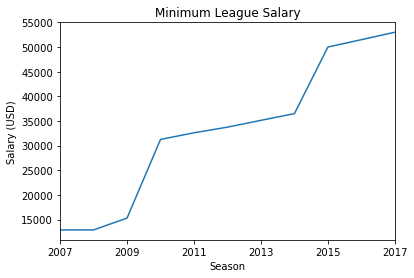

In [46]:
# Observe the Min Salary by Season
mls_min.plot(x = 'Season', y = 'guaranteed_compensation', title = 'Minimum League Salary')
plt.ylabel('Salary (USD)')
plt.show()

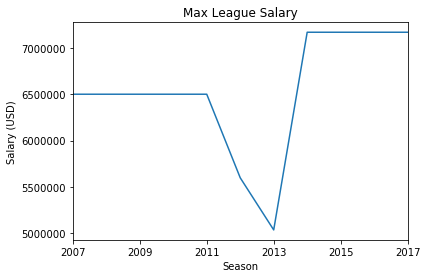

In [47]:
mls_max.plot(x = 'Season', y = 'guaranteed_compensation', title = 'Max League Salary')
plt.ylabel('Salary (USD)')
plt.show()

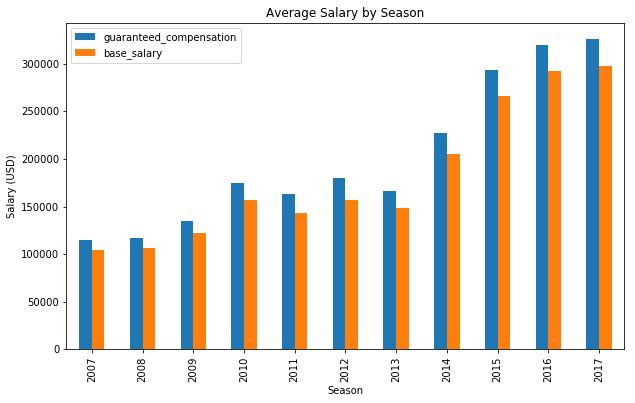

In [48]:
salary_mean = df_mls.groupby('Season').mean()
salary_mean.plot(kind = 'bar',figsize=(10,6), title = "Average Salary by Season")
plt.ylabel("Salary (USD)")
plt.show()

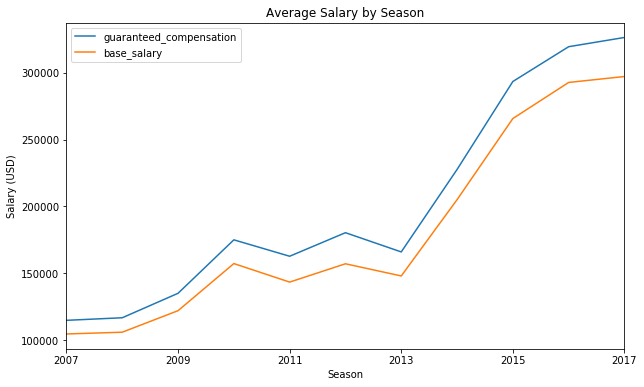

In [49]:
salary_mean[['guaranteed_compensation','base_salary']].plot(title = "Average Salary by Season", figsize=(10,6))
plt.ylabel('Salary (USD)')
plt.show()

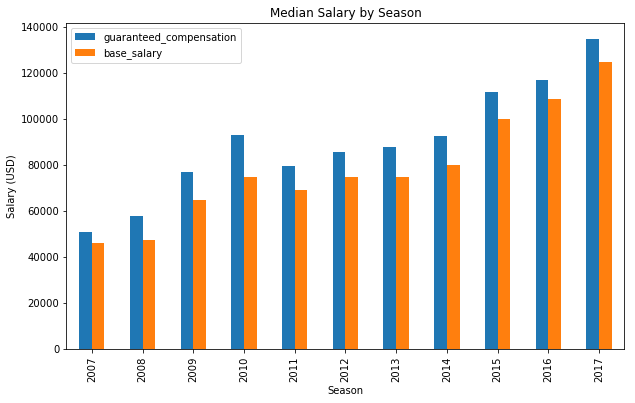

In [50]:
salary_median = df_mls.groupby('Season').median()
salary_median[['guaranteed_compensation','base_salary']].plot(kind = 'bar',figsize=(10,6), title = "Median Salary by Season")
plt.ylabel("Salary (USD)")
plt.show()

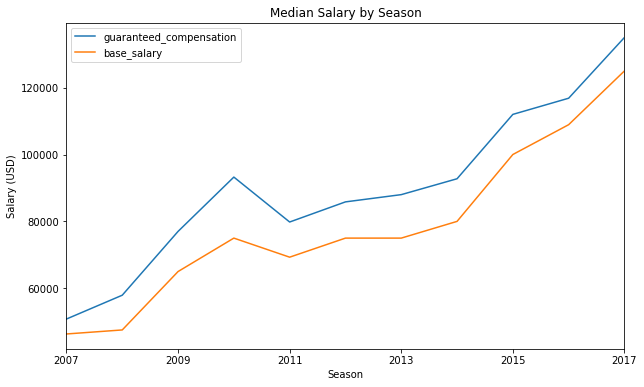

In [51]:
salary_median[['guaranteed_compensation','base_salary']].plot(title = "Median Salary by Season", figsize=(10,6))
plt.ylabel('Salary (USD)')
plt.show()

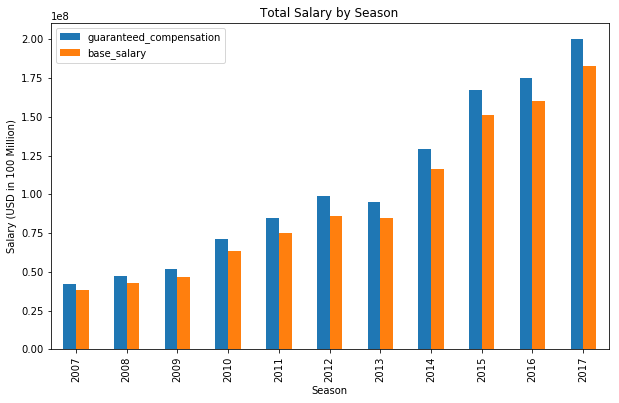

In [52]:
salary_totals = df_mls.groupby('Season').sum()
salary_totals[['guaranteed_compensation','base_salary']].plot(kind = 'bar', title = "Total Salary by Season", figsize=(10,6))
plt.ylabel("Salary (USD in 100 Million)")
plt.show()

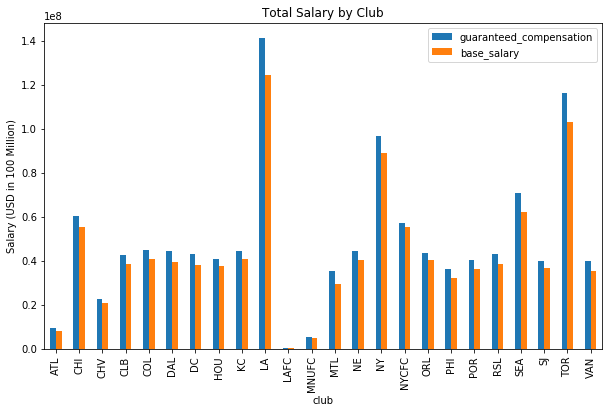

In [53]:
salary_totals_by_club = df_mls.groupby('club').sum()
salary_totals_by_club[['guaranteed_compensation','base_salary']].plot(kind ='bar', title = "Total Salary by Club", figsize=(10,6))
plt.ylabel("Salary (USD in 100 Million)")
plt.show()

Note: LAFC is a new expansion club and they will begin playing in the 2018 Season. 

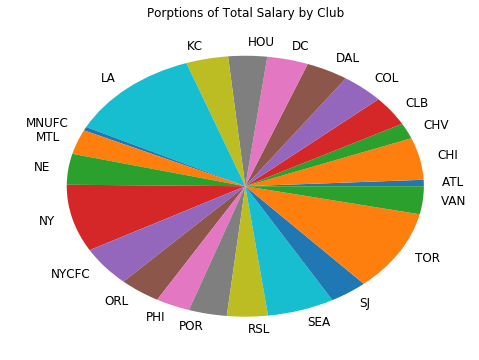

In [54]:
df_mls.drop([5188, 5189], inplace=True)
salary_totals_club = df_mls.groupby('club')['guaranteed_compensation'].sum()
salary_totals_club.sort_values(ascending = False)
plt.axis('off')
salary_totals_club.plot.pie(subplots=False, figsize=(8, 6), fontsize = 12, title = 'Porptions of Total Salary by Club');

LA, TOR, NY, and SEA have had the highest payrolls since 2007.

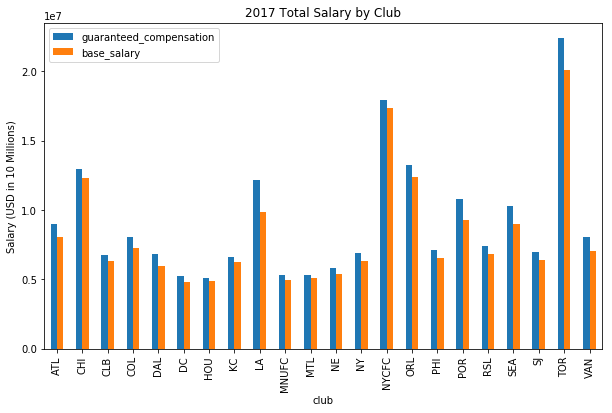

In [55]:
df_mls17 = df_mls[df_mls['Season'] == '2017'].groupby('club').sum()
df_mls17[['guaranteed_compensation','base_salary']].plot(kind = 'bar',figsize=(10,6), title = "2017 Total Salary by Club")
plt.ylabel("Salary (USD in 10 Millions)")
plt.show()

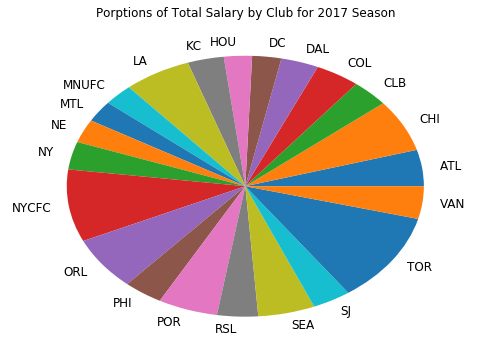

In [56]:
salary_totals_club_2017 = df_mls[df_mls['Season'] == '2017'].groupby('club')['guaranteed_compensation'].sum()
plt.axis('off');
salary_totals_club_2017.plot.pie(subplots=False, figsize=(8, 6), fontsize = 12, title = 'Porptions of Total Salary by Club for 2017 Season');

## Conclusion ##

Overall, Major League Soccer has expanded greatly over the past eleven years. The number of clubs has increased from 11 to 23 clubs (LAFC will begin playing in the 2018 season). The number of players increased from 367 to 614. MLS players have had increased salaries over the years. The league's lowest paid players have had their guaranteed pay increase steadily since 2007. The average salary went from  $\$$114824 to $\$$326375. The median salary increased from $\$$50800 to $\$$135002 over the eleven seasons. Despite this 206% increase, there is still a large disparity between the lowest paid players and the highest paid players in the league. 

The data shows there is an imbalance in the league in terms of club spending, with Los Angeles Galaxy (LA), New York Redbulls (NY), and Toronto (TOR) dominating the league. In addition NYCFC, despite being a newcomer, became a big spender as well. 

Further Study Ideas:
- What can predict a player's salary? Is it a player's nationality, age, number of seasons he played in the league, and/or position?
- Can salary predict how sucessful a player and a club will be for that season?
